In [ ]:
# scrape youtube comments:
# https://smartproxy.com/blog/scraping-youtube-comments

In [25]:
!pip install https://github.com/egbertbouman/youtube-comment-downloader/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     - 10.7 kB 195.8 kB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.4/293.4 KB 6.2 MB/s eta 0:00:00
  Created wheel for youtube-comment-downloader: filename=youtube_comment_downloader-0.1-py3-none-any.whl size=7554 sha256=d218b3cf7d861703803458496cc17cc7dabd88d7c516a77bff8fd3deb7be8ba7
  Stored in directory: /tmp/pip-ephem-wheel-cache-kxbkznw4/wheels/07/79/ec/a65ddb99dbfecd82fc243ed62c334c969298692abacfcd92c6
Successfully built youtube-comment-downloader


In [81]:
from itertools import islice
from youtube_comment_downloader import *

def get_yt_data(video_link):
  downloader = YoutubeCommentDownloader()
  comments = downloader.get_comments_from_url(video_link, sort_by=SORT_BY_POPULAR)
  comments_list = []
  votes_list = []
  for comment in islice(comments, 100):
    if '.' not in comment['cid']:
      comments_list.append(comment['text'])
      votes_list.append(comment['votes'])

  return comments_list, votes_list

In [82]:
video_link = 'https://www.youtube.com/watch?v=Zb5Nylziu6E'
comments_list, votes_list = get_yt_data(video_link)

In [83]:
comments_list[0]

'What kind of application would you build with OpenAI?\n-- Patrick'

In [84]:
comments_list[1]

'12500 words for $1 using the most powerful model!?'

In [85]:
comments_list[2]

'Great video! It would be great if you could point us anywhere that we could learn more about building AssemblyAI + OpenAI Virtual Assistant.'

In [31]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 92.0 MB/s eta 0:00:00


In [32]:
from transformers import pipeline
# Seethal/sentiment_analysis_generic_dataset
# cardiffnlp/twitter-roberta-base-sentiment

In [99]:
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

In [34]:
# Labels: 0 -> Negative; 1 -> Neutral; 2 -> Positive
data = ["I hate you", "I am Karl", "I love you"]
sentiment_pipeline(data)

[{'label': 'LABEL_0', 'score': 0.9952951073646545},
 {'label': 'LABEL_1', 'score': 0.9355706572532654},
 {'label': 'LABEL_2', 'score': 0.9963271021842957}]

In [100]:
k = sentiment_pipeline(comments_list)

In [87]:
# for i in range(len(k)):
#   print(k[i])
#   print(comments_list[i])
#   print("VOTES: ", votes_list[i])
#   print('----------------------------------------')

In [101]:
neg_count = 0
neu_count = 0
pos_count = 0
neg_sentence = []
neu_sentence = []
pos_sentence = []

for i in range(len(k)):
  if k[i]['label'] == 'LABEL_0':
    neg_count += 1
    neg_count += int(votes_list[i])
    neg_sentence.append(comments_list[i])
  elif k[i]['label'] == 'LABEL_1':
    neu_count += 1
    neu_count += int(votes_list[i])
    neu_sentence.append(comments_list[i])
  else:
    pos_count += 1
    pos_count += int(votes_list[i])
    pos_sentence.append(comments_list[i])


In [102]:
print(neg_count, neu_count, pos_count)

30 113 68


In [103]:
total = neg_count + neu_count + pos_count
neg_percentage = neg_count*100/total
neu_percentage = neu_count*100/total
pos_percentage = pos_count*100/total

In [104]:
print('NEG:', neg_percentage)
print('NEU:', neu_percentage)
print('POS:', pos_percentage)

NEG: 14.218009478672986
NEU: 53.55450236966825
POS: 32.22748815165877


([<matplotlib.patches.Wedge at 0x7f72ef2a9a00>,
 [Text(1.0822676360112542, 0.5183596859735636, 'Negative'),
  Text(-1.0130019509741448, 0.6432939043101343, 'Neutral'),
  Text(0.6357346194622991, -1.0177629849906733, 'Positive')],
 [Text(2.1645352720225084, 1.0367193719471273, '14.2%'),
  Text(-2.0260039019482896, 1.2865878086202687, '53.6%'),
  Text(1.2714692389245983, -2.0355259699813466, '32.2%')])

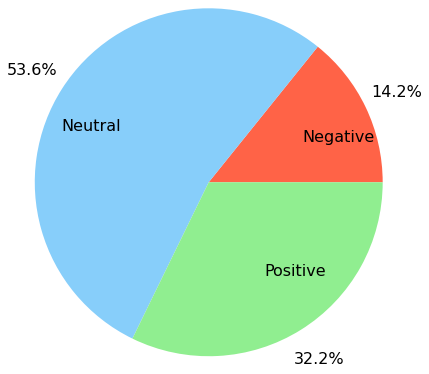

In [105]:
import matplotlib.pyplot as plt

labels = ['Negative', 'Neutral', 'Positive']
sizes = [neg_percentage, neu_percentage, pos_percentage]
# colors = ['tab:red','tab:blue','tab:green']
colors = ['#FF6347', '#87CEFA', '#90EE90']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', 
       pctdistance=1.2, labeldistance=.6, 
       textprops={'fontsize': 16}, radius=2, colors = colors)

In [106]:
for neg in neg_sentence:
  print(neg)
  print()

Was hopping u had a video explaining how to install it. Seems to seems to be very hard 😅

Hey guys I'm a beginner with all of this and I'm trying to figure out how to even get that thing that he is developing on. Can anyone help me out with just setting everything up to just add the code? I feel like I don't know how to start any of this and feel kind of stuff because I can't even get to this beginner level.

Couldn’t quite keep up with the end section. Would be nice to see some examples that are focused on making an app work instead of random examples that have nothing to do with one another.

Copy and pasted the first example but it didnt run, kept showing me directories of python and the folder the project is saved in. Help?

I'm not okay with fees being put on general human knowledge. Not at all.
They should deliver a full self-hosted solution if what they worry about is the cost of running the AIs on distant servers.

this did not work for me. the part where you create the file, i

In [107]:
for neu in neu_sentence:
  print(neu)
  print()

What kind of application would you build with OpenAI?
-- Patrick

I tried using this to get a simple text conversation to see if it would work. It sorta worked but it was like the thing had 0iq. it kept repeating itself and only after saying it a few times it would stop and start repeating something else. It would also just suddendly repeat things form earlier in the conversation for no reason. I used text-davinci-001, max_tokens=50 and i tried temperatures 0.5, 0.8 and 1.     frequency_penalty=0.5,
    presence_penalty=0.0,

Is the code available to look at for your final example (OpenAI and AssemblyAI)?

If you guys get an ModuleNotFound error for openAI the way I solved it is to go to the bottom right corner where it says the version of python I was using and changing it to 3.10.4 64bit C:\Python310\python.exe

Verry interesting, thanks for sharing your knowledge! I saw saw a video where cpt3 gave legal advice, it gave a lot of different anwsers each run that werent correct. Would i

In [108]:
for pos in pos_sentence:
  print(pos)
  print()

12500 words for $1 using the most powerful model!?

Great video! It would be great if you could point us anywhere that we could learn more about building AssemblyAI + OpenAI Virtual Assistant.

Thank you for this! Exactly what I was looking for 💙

I hope they can expand on more payment methods other than credit cards. Digital currency is popular where I live.

Awesome!! Thank you

👍 thanks for sharing

Is anyone else dying when he says, "DaWinchi"? Lol My wife who is slavic also mixes her V's and W's. Love it.

with fees being put on general human knowledge???🤩

Come looking for tutorial/explainer- guy says to read the manual. Great video bro

That's an excellent ai microphone 🎤..by the way...lol

me just wanting to make greentexts:

It is correct in french



### Rough---

In [19]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re

def plot_word_cloud(sentences_list):

  comment_words = ''
  stopwords = set(STOPWORDS)
 
  comments_text = ''
  for sentence in sentences_list:
    comments_text = comments_text + ' ' + re.sub(r'[^A-Za-z0-9 ]+', '', s)

  tokens = comments_text.split(' ')
    
  # Converts each token into lowercase
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

  comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 800, height = 800,
          background_color ='white',
          stopwords = stopwords,
          min_font_size = 5).generate(comment_words)

  # plot the WordCloud image					
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.show()

In [44]:
import re
neg_sentence = []
pos_sentence = []
s = 'Great video! It would be great if you could point us anywhere that we could learn more about building AssemblyAI + OpenAI Virtual Assistant.'
comments_text = re.sub(r'[^A-Za-z0-9 ]+', '', s)

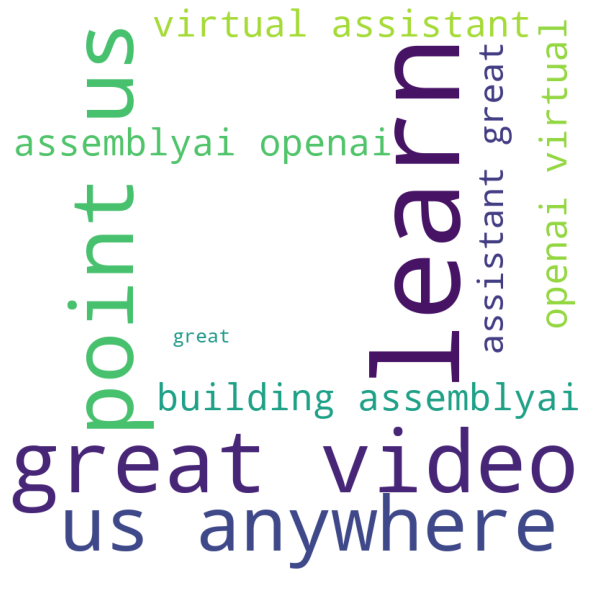

In [55]:
plot_word_cloud(pos_sentence)

In [46]:
comments_text

'Great video It would be great if you could point us anywhere that we could learn more about building AssemblyAI  OpenAI Virtual Assistant'

In [ ]:
plot_word_cloud(comments_text)

In [50]:
comments_text

' Great video It would be great if you could point us anywhere that we could learn more about building AssemblyAI  OpenAI Virtual Assistant Great video It would be great if you could point us anywhere that we could learn more about building AssemblyAI  OpenAI Virtual Assistant Great video It would be great if you could point us anywhere that we could learn more about building AssemblyAI  OpenAI Virtual Assistant Great video It would be great if you could point us anywhere that we could learn more about building AssemblyAI  OpenAI Virtual Assistant Great video It would be great if you could point us anywhere that we could learn more about building AssemblyAI  OpenAI Virtual Assistant Great video It would be great if you could point us anywhere that we could learn more about building AssemblyAI  OpenAI Virtual Assistant Great video It would be great if you could point us anywhere that we could learn more about building AssemblyAI  OpenAI Virtual Assistant Great video It would be great if

In [57]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 9.5 MB/s eta 0:00:00


In [58]:
import transformers
import shap

# load a transformers pipeline model
model = transformers.pipeline('sentiment-analysis', return_all_scores=True)

# explain the model on two sample inputs
explainer = shap.Explainer(model) 
shap_values = explainer(["What a great movie! ...if you have no taste."])

# visualize the first prediction's explanation for the POSITIVE output class
shap.plots.text(shap_values[0, :, "POSITIVE"])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


`return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.


  0%|          | 0/240 [00:00<?, ?it/s]

Partition explainer: 2it [00:30, 30.80s/it]               


In [59]:
shap_values = explainer(["What a great movie! ...if you have no taste."])

# visualize the first prediction's explanation for the POSITIVE output class
# shap.plots.text(shap_values[0, :, "POSITIVE"])

  0%|          | 0/240 [00:00<?, ?it/s]

Partition explainer: 2it [00:25, 25.84s/it]               


In [63]:
shap.plots.text(shap_values[0, :, "POSITIVE"])

In [64]:
shap_values[0, :, "POSITIVE"]

.values =
array([ 0.        , -0.04310007,  0.12085257,  0.74012209,  0.00951386,
       -0.04705491, -0.009709  , -0.0261468 , -0.02606418,  0.07404681,
        0.11968756,  0.00950675, -0.2737899 , -0.03514253, -0.02919793,
        0.        ])

.base_values =
0.4163283407688141

.data =
array(['', 'What ', 'a ', 'great ', 'movie', '! ', '.', '.', '.', 'if ',
       'you ', 'have ', 'no ', 'taste', '.', ''], dtype='<U6')

In [69]:
neg_sentence[3]

'"Getting started" Immediately skips the set up.'

In [75]:
shap_values = explainer(neg_sentence)


  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   9%|▉         | 1/11 [00:00<?, ?it/s]

  0%|          | 0/462 [00:00<?, ?it/s]

Partition explainer:  27%|██▋       | 3/11 [02:25<01:49, 13.71s/it]

  0%|          | 0/462 [00:00<?, ?it/s]

Partition explainer:  36%|███▋      | 4/11 [02:54<02:21, 20.26s/it]

  0%|          | 0/156 [00:00<?, ?it/s]

Partition explainer:  45%|████▌     | 5/11 [03:07<01:46, 17.67s/it]

  0%|          | 0/342 [00:00<?, ?it/s]

Partition explainer:  55%|█████▍    | 6/11 [03:25<01:28, 17.64s/it]

  0%|          | 0/272 [00:00<?, ?it/s]

Partition explainer:  64%|██████▎   | 7/11 [03:46<01:14, 18.61s/it]

  0%|          | 0/240 [00:00<?, ?it/s]

Partition explainer: 100%|██████████| 11/11 [04:14<00:00,  8.26s/it]

  0%|          | 0/132 [00:00<?, ?it/s]

Partition explainer: 12it [04:19, 23.63s/it]


In [80]:
shap.plots.text(shap_values[2, :, "NEGATIVE"])

In [77]:
mak = max(shap_values[0, :, "NEGATIVE"].values)
index = shap_values[0, :, "NEGATIVE"].values.index(mak)
print(shap_values[0, :, "NEGATIVE"].data[index])

AttributeError: ignored

In [78]:
mak

0.017579957149288755